<a href="https://colab.research.google.com/github/FuriouStyles/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [13]:
!pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 2.8MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


In [0]:
import pandas as pd

persons_data_url = "https://raw.githubusercontent.com/FuriouStyles/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv"
df = pd.read_csv(persons_data_url)

In [3]:
# There isn't enough data here to cross tabulate anything yet, so we will create 
# a new column filled with a binary true/false that shows whether or not a 
# person is active according to the American Heart Association. 
# https://www.heart.org/en/healthy-living/fitness/fitness-basics/aha-recs-for-physical-activity-in-adults

df['is_active'] = df['exercise_time'] > 75
df.head()

,Unnamed: 0,age,weight,exercise_time,is_active
0,0,44,118,192,True
1,1,41,161,35,False
2,2,46,128,220,True
3,3,39,216,57,False
4,4,28,116,182,True


In [10]:
# Crosstabulate and bin
age_bins = pd.cut(df['age'], 6)
weight_bins = pd.cut(df['weight'], 6)
pd.crosstab(age_bins, [weight_bins, df['is_active']])

weight           (99.854, 124.333]        ...  (221.667, 246.0]      
is_active                    False True   ...             False True 
age                                       ...                        
(17.938, 28.333]                 8    48  ...                 5     0
(28.333, 38.667]                11    59  ...                 4     0
(38.667, 49.0]                   3    46  ...                 5     0
(49.0, 59.333]                   8    42  ...                 1     0
(59.333, 69.667]                 9    21  ...                 9     0
(69.667, 80.0]                  17    22  ...                13     2

[6 rows x 12 columns]

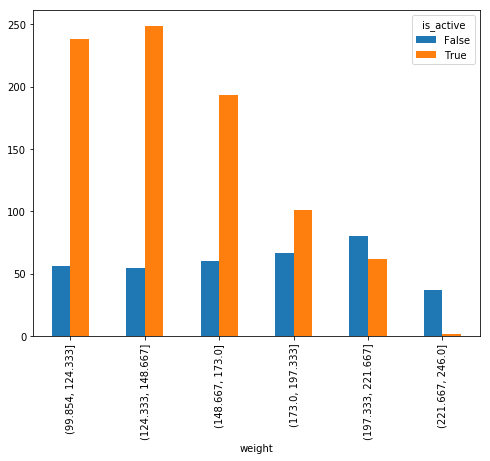

In [23]:
# This crosstabulation tells us something that is easily recognizable: if you are
# not active as defined by the American Heart Association then you are significantly
# more likely to be heavier regardless of your age. Visualizing this crosstabulation
# would be very messy, however we can see this trend in the bar
# plot below when age is not taken into account at all.
ctab = pd.crosstab(weight_bins, df['is_active'])
ctab.plot(kind='bar', figsize=(8,6))

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


### Assignment Answers



1.   There are a number of different kinds of data. Age and weight are both continuous variables. Exercise time is a measured variable.  
2.   There is a clear relationship between weight and exercise time. Those that lead an active lifestyle as defined by the American Heart Association, which is more than 75 minutes per week of vigorous aerobic activity, are much less likely to be heavier.
3.   The relationship with activity levels and weight are clear, and age appears to be the confounding variable that doesn't have as much of an impact on weight as I would have thought. 




## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)